Connected to myenv (Python 3.12.8)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
# Create folder for images
os.makedirs("figures", exist_ok=True)

data_path = "../data/processed/"
drive = pd.read_csv(f"{data_path}drive11_clean.csv")

In [3]:
# ============================================
# Drive Dataset Correlation Heatmap
# ============================================
print(drive.columns.tolist())

features = [
    'engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load',
    'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1',
    'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e',
    'commanded_throttle_actuator', 'fuel_air_commanded_equiv_ratio',
    'absolute_barometric_pressure', 'relative_throttle_position', 'intake_air_temp',
    'timing_advance', 'catalyst_temperature_bank1_sensor1',
    'catalyst_temperature_bank1_sensor2', 'control_module_voltage',
    'commanded_evaporative_purge', 'time_run_with_mil_on',
    'time_since_trouble_codes_cleared', 'distance_traveled_with_mil_on',
    'warm_ups_since_codes_cleared'
]

print("\n" + "="*50)
print("CORRELATION WITH FEATURES")
print("="*50)
corr = drive[features].corr()
print(corr)

['engine_run_tine', 'engine_rpm', 'vehicle_speed', 'throttle', 'engine_load', 'coolant_temperature', 'long_term_fuel_trim_bank_1', 'short_term_fuel_trim_bank_1', 'intake_manifold_pressure', 'fuel_tank', 'absolute_throttle_b', 'pedal_d', 'pedal_e', 'commanded_throttle_actuator', 'fuel_air_commanded_equiv_ratio', 'absolute_barometric_pressure', 'relative_throttle_position', 'intake_air_temp', 'timing_advance', 'catalyst_temperature_bank1_sensor1', 'catalyst_temperature_bank1_sensor2', 'control_module_voltage', 'commanded_evaporative_purge', 'time_run_with_mil_on', 'time_since_trouble_codes_cleared', 'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared']

CORRELATION WITH FEATURES
                                    engine_run_tine  engine_rpm  \
engine_run_tine                            1.000000    0.258692   
engine_rpm                                 0.258692    1.000000   
vehicle_speed                              0.308887    0.888363   
throttle                           

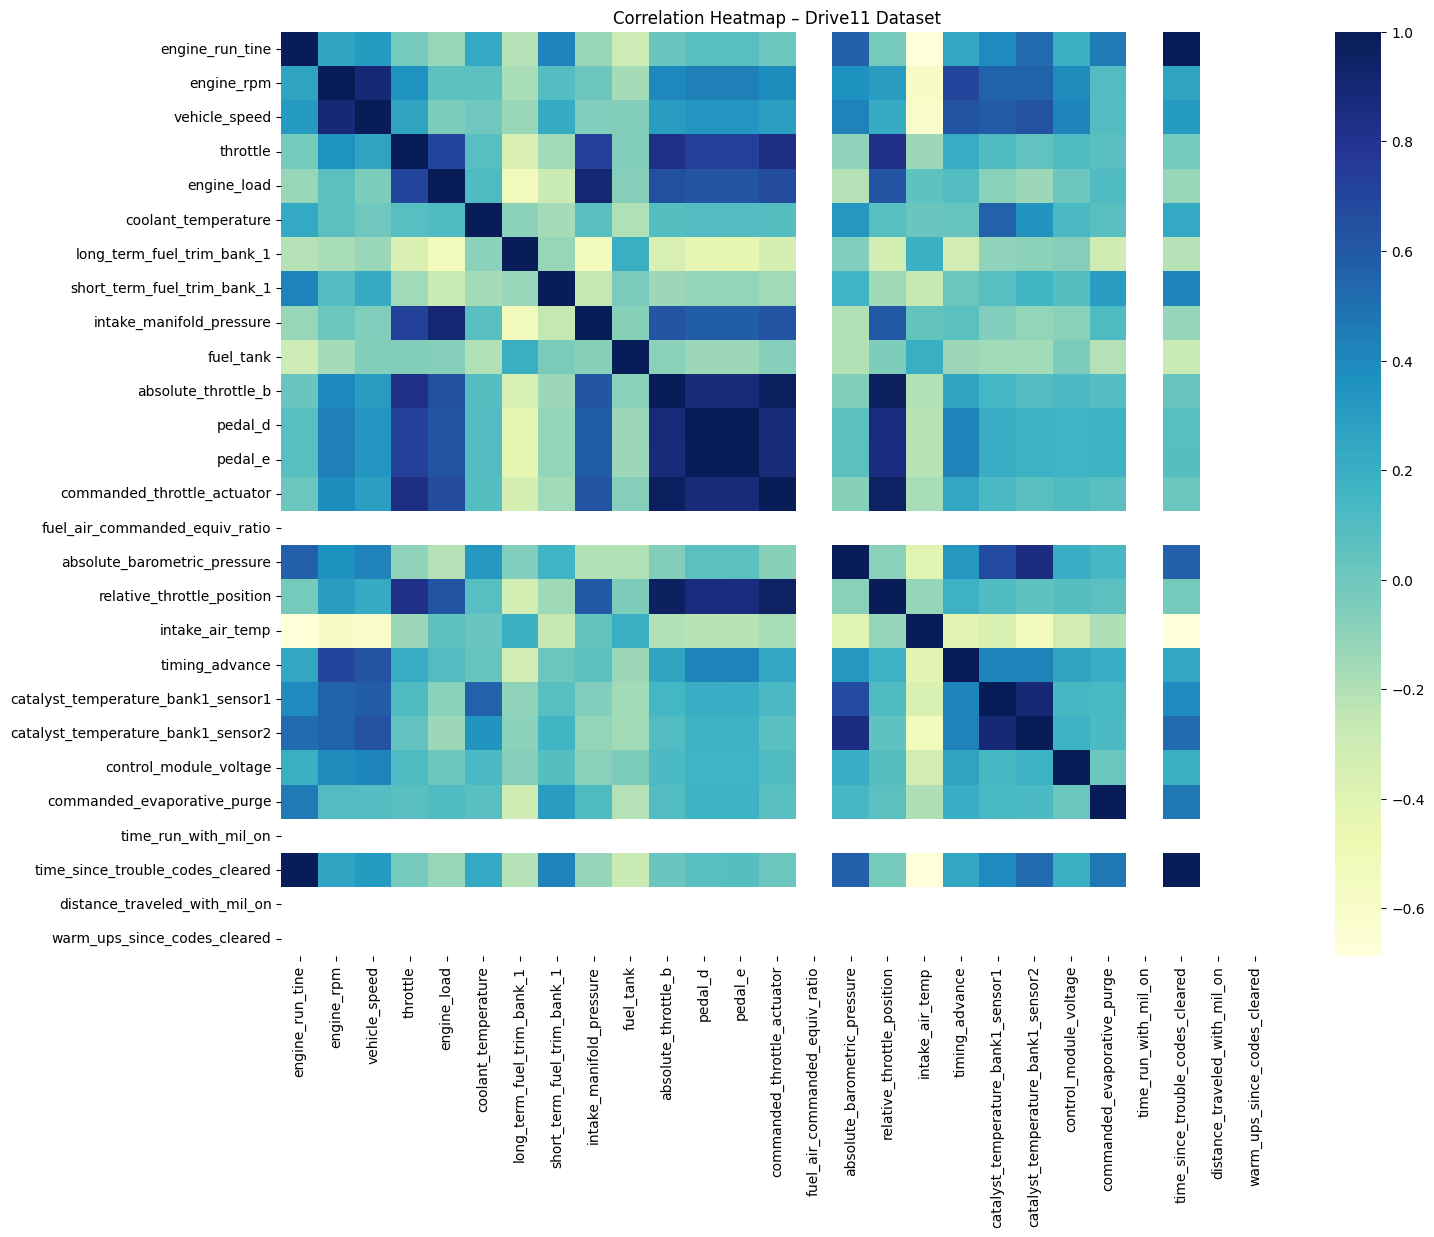

In [4]:
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(drive[features].corr(), cmap='YlGnBu')
plt.title("Correlation Heatmap – Drive11 Dataset")
plt.savefig("figures/drive11_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
print("\nNaN values per column in correlation matrix:")
print(corr[features].isna().sum())
columns_to_drop = ['fuel_air_commanded_equiv_ratio', 'time_run_with_mil_on', 
                   'distance_traveled_with_mil_on', 'warm_ups_since_codes_cleared']


NaN values per column in correlation matrix:
engine_run_tine                        4
engine_rpm                             4
vehicle_speed                          4
throttle                               4
engine_load                            4
coolant_temperature                    4
long_term_fuel_trim_bank_1             4
short_term_fuel_trim_bank_1            4
intake_manifold_pressure               4
fuel_tank                              4
absolute_throttle_b                    4
pedal_d                                4
pedal_e                                4
commanded_throttle_actuator            4
fuel_air_commanded_equiv_ratio        27
absolute_barometric_pressure           4
relative_throttle_position             4
intake_air_temp                        4
timing_advance                         4
catalyst_temperature_bank1_sensor1     4
catalyst_temperature_bank1_sensor2     4
control_module_voltage                 4
commanded_evaporative_purge            4
time_run_wi

In [6]:
# Remove them from feature list
features_clean = [f for f in features if f not in columns_to_drop]
# Recompute correlation without the problematic columns
corr_clean = drive[features_clean].corr()
print("\nCleaned correlation matrix:")
print(corr_clean)


Cleaned correlation matrix:
                                    engine_run_tine  engine_rpm  \
engine_run_tine                            1.000000    0.258692   
engine_rpm                                 0.258692    1.000000   
vehicle_speed                              0.308887    0.888363   
throttle                                  -0.021673    0.355842   
engine_load                               -0.124291    0.062622   
coolant_temperature                        0.234928    0.059749   
long_term_fuel_trim_bank_1                -0.209996   -0.175604   
short_term_fuel_trim_bank_1                0.426225    0.093858   
intake_manifold_pressure                  -0.119950    0.011275   
fuel_tank                                 -0.291481   -0.161522   
absolute_throttle_b                        0.021813    0.405240   
pedal_d                                    0.081809    0.434669   
pedal_e                                    0.084169    0.437157   
commanded_throttle_actuator      

In [7]:
# Copy for consistency
corr_matrix = corr_clean.copy()
# Flatten the matrix and keep only upper triangle
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

strongest_pos = upper_tri.stack().sort_values(ascending=False)
print("\n" + "="*50)
print("Strongest positive correlations:")
print("="*50)
print(strongest_pos.head(10))  

print("\n" + "="*50)
print("Strongest positive correlations:")
print("="*50)
strongest_neg = upper_tri.stack().sort_values(ascending=True)
print("Strongest negative correlations:")
print(strongest_neg.head(10))  


Strongest positive correlations:
engine_run_tine                     time_since_trouble_codes_cleared      0.999310
pedal_d                             pedal_e                               0.995538
absolute_throttle_b                 commanded_throttle_actuator           0.974774
                                    relative_throttle_position            0.965949
commanded_throttle_actuator         relative_throttle_position            0.954484
engine_load                         intake_manifold_pressure              0.904322
catalyst_temperature_bank1_sensor1  catalyst_temperature_bank1_sensor2    0.891955
engine_rpm                          vehicle_speed                         0.888363
absolute_throttle_b                 pedal_d                               0.883288
pedal_d                             commanded_throttle_actuator           0.878615
dtype: float64

Strongest positive correlations:
Strongest negative correlations:
intake_air_temp             time_since_trouble_codes_c

In [8]:
# ===========================================
# Scatter plots for strongest correlations
# ===========================================

os.makedirs("figures/drive11_scatter/positive", exist_ok=True)
os.makedirs("figures/drive11_scatter/negative", exist_ok=True)


Creating scatter plots for top 5 positive correlations...


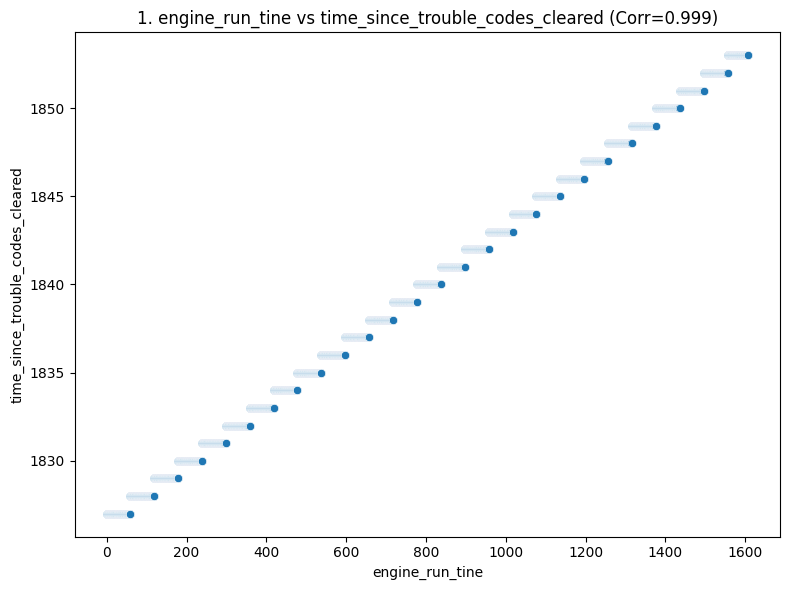

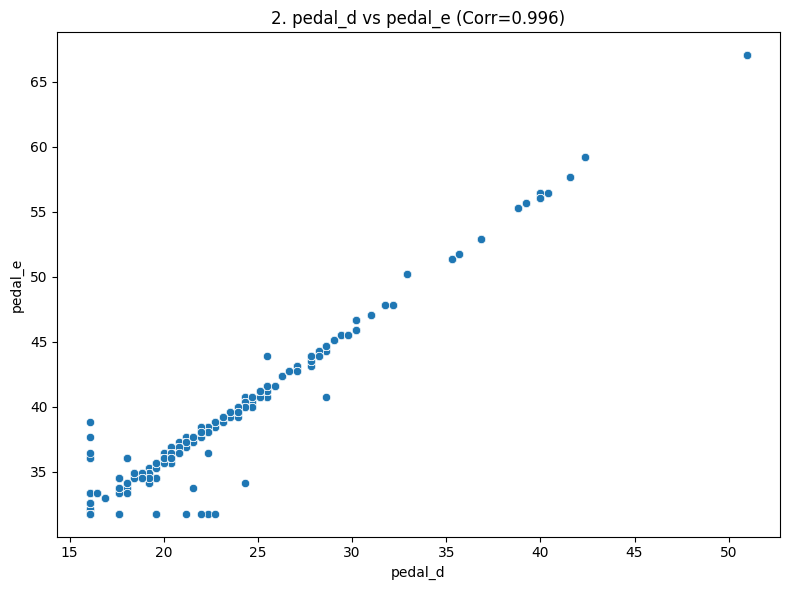

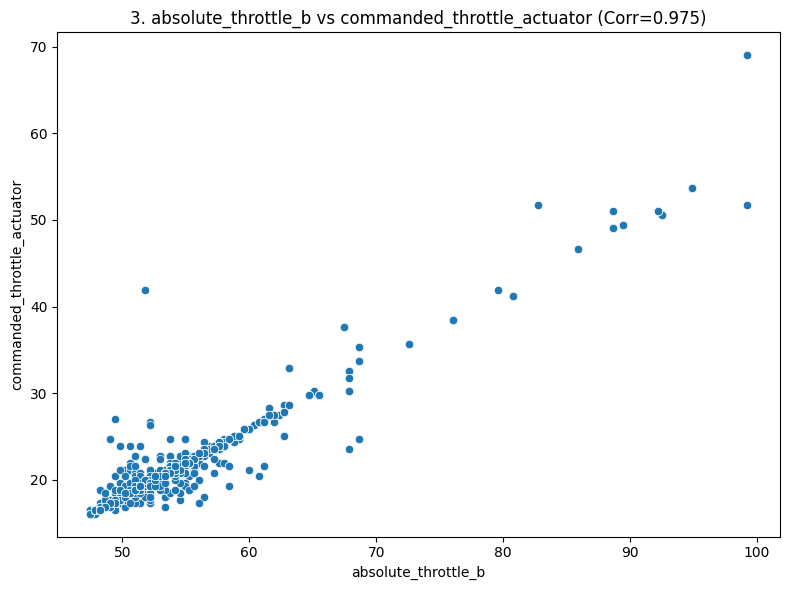

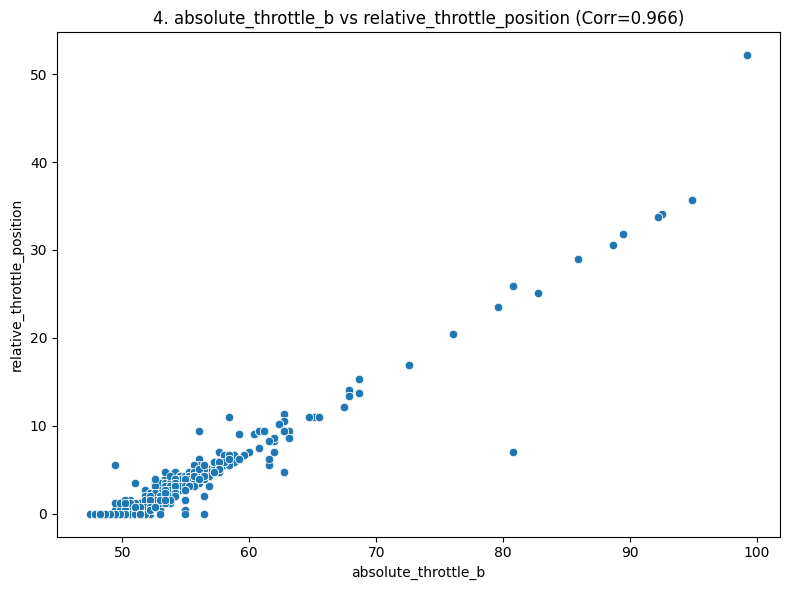

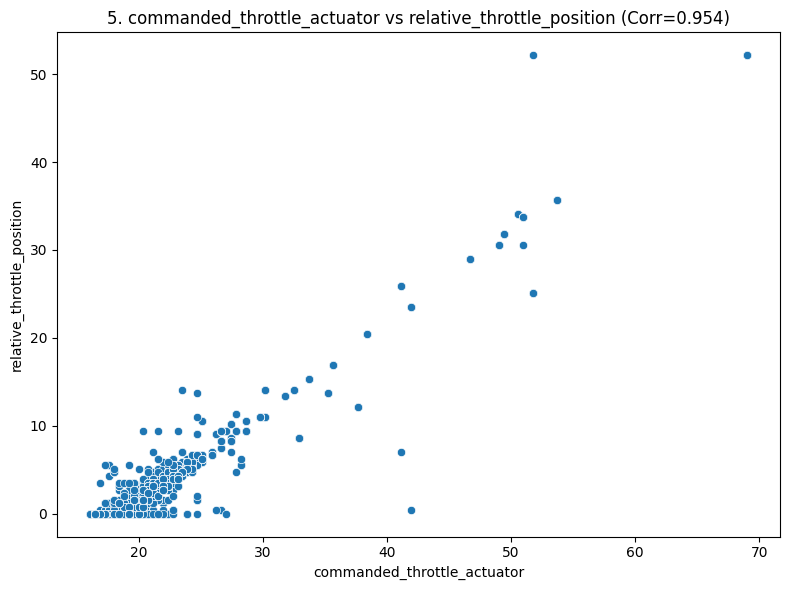

In [9]:
# Top 5 positive correlations
top5_pos = strongest_pos.head(5)
print("\nCreating scatter plots for top 5 positive correlations...")
for i, ((col1, col2), value) in enumerate(top5_pos.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=drive, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/drive11_scatter/positive/scatter_pos{i}_{col1}_{col2}.png", dpi=300)
    plt.show()

Creating scatter plots for top 5 negative correlations...


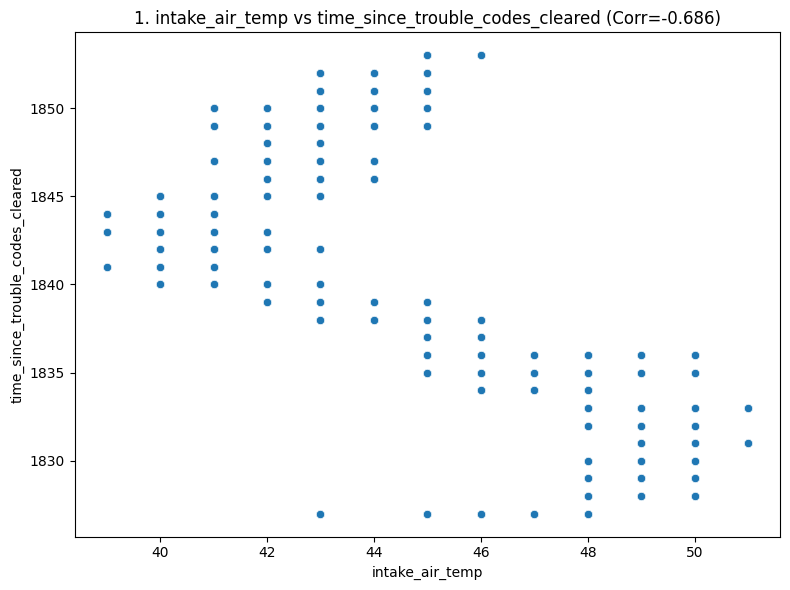

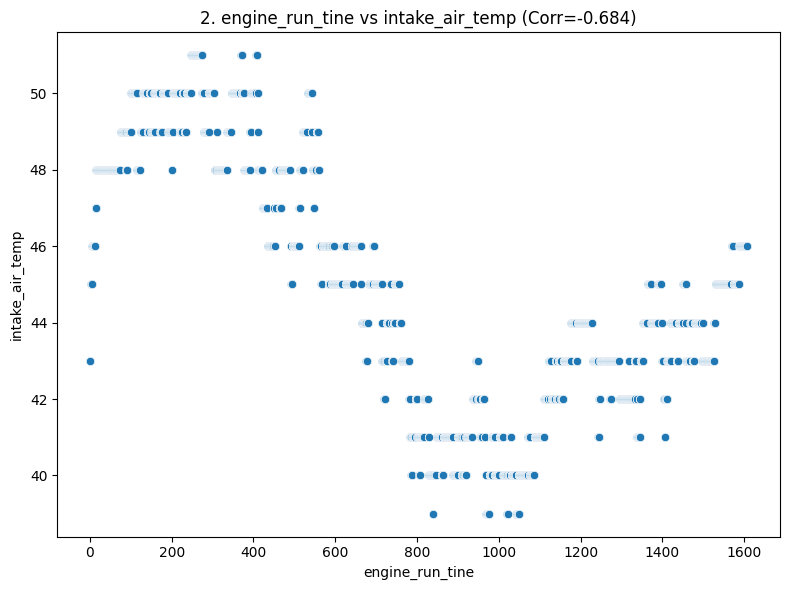

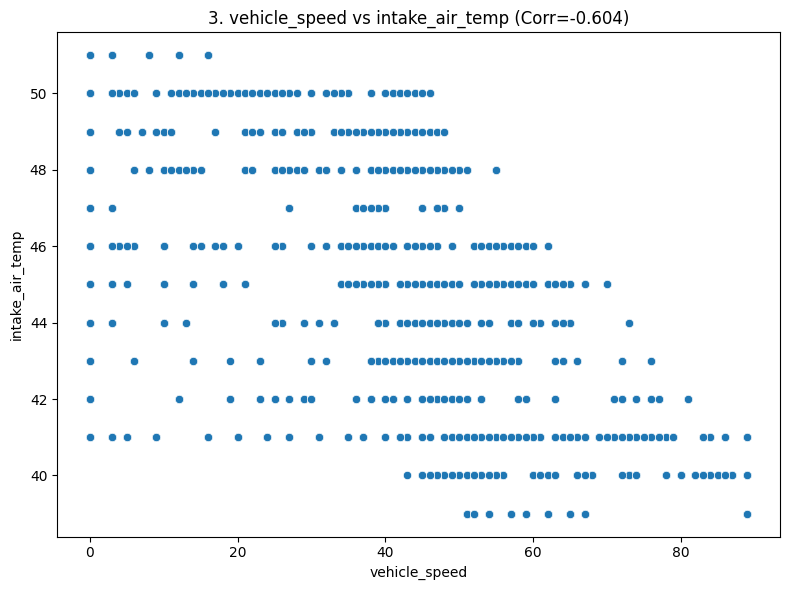

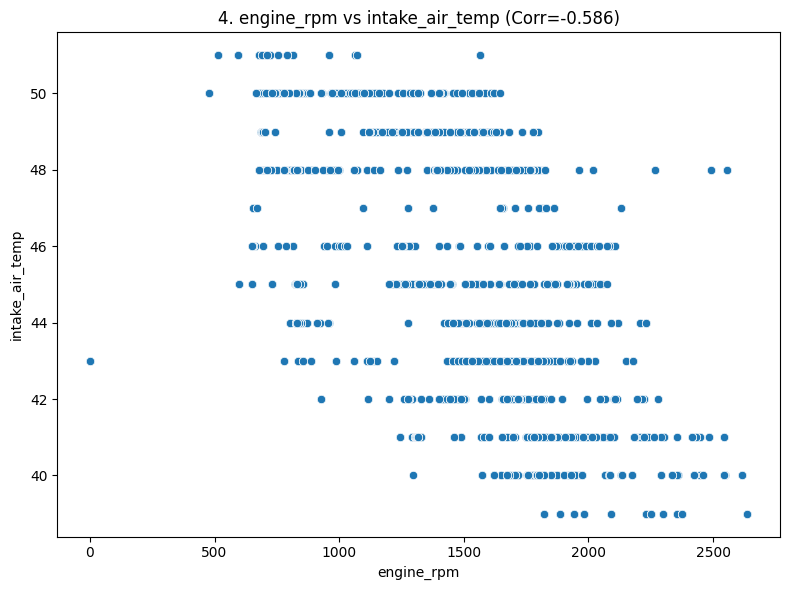

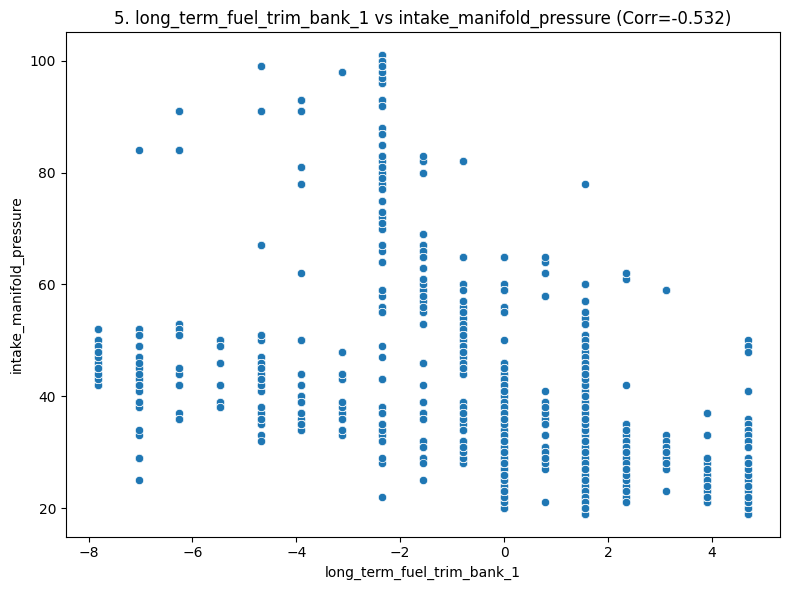

In [10]:
# Top 5 negative correlations
top5_neg = strongest_neg.head(5)
print("Creating scatter plots for top 5 negative correlations...")
for i, ((col1, col2), value) in enumerate(top5_neg.items(), 1):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=drive, x=col1, y=col2)
    plt.title(f"{i}. {col1} vs {col2} (Corr={value:.3f})")
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.tight_layout()
    plt.savefig(f"figures/drive11_scatter/negative/scatter_neg{i}_{col1}_{col2}.png", dpi=300)
    plt.show()